In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [2]:
dataset = 'model/point_history_classifier/point_history.csv'
model_save_path = 'model/point_history_classifier/point_history_classifier.hdf5'

# Set number of classes

In [3]:
NUM_CLASSES = 4

# Input length

In [4]:
TIME_STEPS = 16
DIMENSION = 2

# Dataset reading

In [5]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (TIME_STEPS * DIMENSION) + 1)))

In [6]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Builing the LSTM model

In [8]:
model = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape=(TIME_STEPS * DIMENSION, )),
        tf.keras.layers.Reshape((TIME_STEPS, DIMENSION), input_shape=(TIME_STEPS * DIMENSION, )),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.LSTM(16, input_shape=[TIME_STEPS, DIMENSION], return_sequences=True),
        tf.keras.layers.LSTM(32, return_sequences=True, activation='relu'),
        tf.keras.layers.LSTM(16, return_sequences=False, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(24, activation='relu'),
        tf.keras.layers.Dense(12, activation='relu'),
        tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
    ])

In [9]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 16, 2)             0         
                                                                 
 dropout (Dropout)           (None, 16, 2)             0         
                                                                 
 lstm (LSTM)                 (None, 16, 16)            1216      
                                                                 
 lstm_1 (LSTM)               (None, 16, 32)            6272      
                                                                 
 lstm_2 (LSTM)               (None, 16)                3136      
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense (Dense)               (None, 24)                4

In [10]:
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [11]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Training the model

In [12]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
15/15 [==============================] - ETA: 0s - loss: 1.3672 - accuracy: 0.6227
Epoch 1: saving model to model/point_history_classifier\point_history_classifier.hdf5
15/15 [==============================] - 16s 267ms/step - loss: 1.3672 - accuracy: 0.6227 - val_loss: 1.3395 - val_accuracy: 0.6228
Epoch 2/1000
15/15 [==============================] - ETA: 0s - loss: 1.3124 - accuracy: 0.6466
Epoch 2: saving model to model/point_history_classifier\point_history_classifier.hdf5
15/15 [==============================] - 1s 50ms/step - loss: 1.3124 - accuracy: 0.6466 - val_loss: 1.2595 - val_accuracy: 0.6341
Epoch 3/1000
15/15 [==============================] - ETA: 0s - loss: 1.1997 - accuracy: 0.6466
Epoch 3: saving model to model/point_history_classifier\point_history_classifier.hdf5
15/15 [==============================] - 1s 47ms/step - loss: 1.1997 - accuracy: 0.6466 - val_loss: 1.0750 - val_accuracy: 0.6341
Epoch 4/1000
15/15 [==============================] - ETA: 0s 

15/15 [==============================] - ETA: 0s - loss: 0.3836 - accuracy: 0.8654
Epoch 27: saving model to model/point_history_classifier\point_history_classifier.hdf5
15/15 [==============================] - 1s 47ms/step - loss: 0.3836 - accuracy: 0.8654 - val_loss: 0.3557 - val_accuracy: 0.8829
Epoch 28/1000
15/15 [==============================] - ETA: 0s - loss: 0.3766 - accuracy: 0.8664
Epoch 28: saving model to model/point_history_classifier\point_history_classifier.hdf5
15/15 [==============================] - 1s 45ms/step - loss: 0.3766 - accuracy: 0.8664 - val_loss: 0.3318 - val_accuracy: 0.8748
Epoch 29/1000
14/15 [===========================>..] - ETA: 0s - loss: 0.3623 - accuracy: 0.8772
Epoch 29: saving model to model/point_history_classifier\point_history_classifier.hdf5
15/15 [==============================] - 1s 41ms/step - loss: 0.3640 - accuracy: 0.8773 - val_loss: 0.3894 - val_accuracy: 0.8780
Epoch 30/1000
15/15 [==============================] - ETA: 0s - loss: 0

14/15 [===========================>..] - ETA: 0s - loss: 0.3146 - accuracy: 0.8984
Epoch 53: saving model to model/point_history_classifier\point_history_classifier.hdf5
15/15 [==============================] - 1s 44ms/step - loss: 0.3110 - accuracy: 0.8996 - val_loss: 0.3030 - val_accuracy: 0.8862
Epoch 54/1000
15/15 [==============================] - ETA: 0s - loss: 0.3046 - accuracy: 0.9012
Epoch 54: saving model to model/point_history_classifier\point_history_classifier.hdf5
15/15 [==============================] - 1s 45ms/step - loss: 0.3046 - accuracy: 0.9012 - val_loss: 0.2792 - val_accuracy: 0.9122
Epoch 55/1000
14/15 [===========================>..] - ETA: 0s - loss: 0.2914 - accuracy: 0.9090
Epoch 55: saving model to model/point_history_classifier\point_history_classifier.hdf5
15/15 [==============================] - 1s 44ms/step - loss: 0.2912 - accuracy: 0.9083 - val_loss: 0.2746 - val_accuracy: 0.9073
Epoch 56/1000
15/15 [==============================] - ETA: 0s - loss: 0

15/15 [==============================] - ETA: 0s - loss: 0.2500 - accuracy: 0.9300
Epoch 79: saving model to model/point_history_classifier\point_history_classifier.hdf5
15/15 [==============================] - 1s 47ms/step - loss: 0.2500 - accuracy: 0.9300 - val_loss: 0.2624 - val_accuracy: 0.9138
Epoch 80/1000
15/15 [==============================] - ETA: 0s - loss: 0.2529 - accuracy: 0.9251
Epoch 80: saving model to model/point_history_classifier\point_history_classifier.hdf5
15/15 [==============================] - 1s 44ms/step - loss: 0.2529 - accuracy: 0.9251 - val_loss: 0.2411 - val_accuracy: 0.9268
Epoch 81/1000
15/15 [==============================] - ETA: 0s - loss: 0.2405 - accuracy: 0.9278
Epoch 81: saving model to model/point_history_classifier\point_history_classifier.hdf5
15/15 [==============================] - 1s 45ms/step - loss: 0.2405 - accuracy: 0.9278 - val_loss: 0.2438 - val_accuracy: 0.9220
Epoch 82/1000
15/15 [==============================] - ETA: 0s - loss: 0

15/15 [==============================] - ETA: 0s - loss: 0.2286 - accuracy: 0.9327
Epoch 105: saving model to model/point_history_classifier\point_history_classifier.hdf5
15/15 [==============================] - 1s 45ms/step - loss: 0.2286 - accuracy: 0.9327 - val_loss: 0.2356 - val_accuracy: 0.9317
Epoch 106/1000
14/15 [===========================>..] - ETA: 0s - loss: 0.2286 - accuracy: 0.9314
Epoch 106: saving model to model/point_history_classifier\point_history_classifier.hdf5
15/15 [==============================] - 1s 45ms/step - loss: 0.2236 - accuracy: 0.9332 - val_loss: 0.2547 - val_accuracy: 0.9154
Epoch 107/1000
15/15 [==============================] - ETA: 0s - loss: 0.2343 - accuracy: 0.9332
Epoch 107: saving model to model/point_history_classifier\point_history_classifier.hdf5
15/15 [==============================] - 1s 44ms/step - loss: 0.2343 - accuracy: 0.9332 - val_loss: 0.2633 - val_accuracy: 0.9171
Epoch 108/1000
15/15 [==============================] - ETA: 0s - l

Epoch 131/1000
13/15 [=========================>....] - ETA: 0s - loss: 0.2119 - accuracy: 0.9399
Epoch 131: saving model to model/point_history_classifier\point_history_classifier.hdf5
15/15 [==============================] - 1s 43ms/step - loss: 0.2147 - accuracy: 0.9387 - val_loss: 0.2518 - val_accuracy: 0.9268
Epoch 132/1000
15/15 [==============================] - ETA: 0s - loss: 0.2184 - accuracy: 0.9327
Epoch 132: saving model to model/point_history_classifier\point_history_classifier.hdf5
15/15 [==============================] - 1s 45ms/step - loss: 0.2184 - accuracy: 0.9327 - val_loss: 0.2257 - val_accuracy: 0.9333
Epoch 133/1000
14/15 [===========================>..] - ETA: 0s - loss: 0.2095 - accuracy: 0.9375
Epoch 133: saving model to model/point_history_classifier\point_history_classifier.hdf5
15/15 [==============================] - 1s 44ms/step - loss: 0.2080 - accuracy: 0.9376 - val_loss: 0.2240 - val_accuracy: 0.9366
Epoch 134/1000
13/15 [=========================>....

In [13]:
model = tf.keras.models.load_model(model_save_path)

In [14]:
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 2s 2s/step
[9.2678201e-01 6.4145698e-04 3.7245627e-04 7.2204083e-02]
0


# Confusion matrix

20/20 [==============================] - 0s 8ms/step


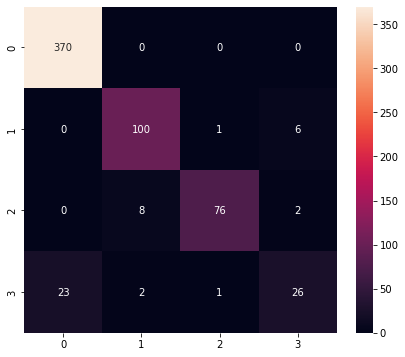

Classification Report
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       370
           1       0.91      0.93      0.92       107
           2       0.97      0.88      0.93        86
           3       0.76      0.50      0.60        52

    accuracy                           0.93       615
   macro avg       0.90      0.83      0.86       615
weighted avg       0.93      0.93      0.92       615



In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert model so it fits in a .tflite

In [16]:
model.save(model_save_path, include_optimizer=False)
model = tf.keras.models.load_model(model_save_path)

In [17]:
tflite_save_path = 'model/point_history_classifier/point_history_classifier.tflite'

In [18]:
from tensorflow import lite

converter = tf.lite.TFLiteConverter.from_keras_model(model)
# converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_path)
converter.optimizations = [tf.lite.Optimize.DEFAULT]

converter.experimental_new_converter=True
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS,
tf.lite.OpsSet.SELECT_TF_OPS]

tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\HP\AppData\Local\Temp\tmp8wlwxmyj\assets


INFO:tensorflow:Assets written to: C:\Users\HP\AppData\Local\Temp\tmp8wlwxmyj\assets


41712

# Interference test

In [19]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [20]:
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print(input_details)

[{'name': 'serving_default_input_1:0', 'index': 0, 'shape': array([ 1, 32]), 'shape_signature': array([-1, 32]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


In [21]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [22]:
%%time
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

Wall time: 8 ms


In [23]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[9.2413223e-01 7.0696813e-04 4.2156139e-04 7.4739151e-02]
0
